### numpy 使用梯度下降实现线性回归

参考：[stackoverflow: gradient descent using python and numpy
](https://stackoverflow.com/questions/17784587/gradient-descent-using-python-and-numpy)

- Calculate the hypothesis h = X * theta
- Calculate the loss = h - y and maybe the squared cost (loss^2)/2m
- Calculate the gradient = X.T * loss / m
- Update the parameters theta = theta - alpha * gradient

拓展：

[Linear Regression with NumPy - Using gradient descent to perform linear regression](https://www.cs.toronto.edu/~frossard/post/linear_regression/)

[易懂的神经网络理论到实践(1)：单个神经元+随机梯度下降学习逻辑与规则](https://zhuanlan.zhihu.com/p/59678480)

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# m denotes the number of examples here, not the number of features
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        if i % 1000 == 0:
            print('Iteration %d | Cost: %f' % (i, cost))
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    return theta

In [3]:
def generate_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [4]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = generate_data(100, 25, 10)
m, n = np.shape(x)

numIterations= 100000
alpha = 0.0001

In [5]:
theta = np.ones(n)
theta = gradientDescent(x, y, theta, alpha, m, numIterations)
print(theta)

Iteration 0 | Cost: 418.266199
Iteration 1000 | Cost: 100.042779
Iteration 2000 | Cost: 95.282448
Iteration 3000 | Cost: 90.757644
Iteration 4000 | Cost: 86.456713
Iteration 5000 | Cost: 82.368579
Iteration 6000 | Cost: 78.482714
Iteration 7000 | Cost: 74.789110
Iteration 8000 | Cost: 71.278253
Iteration 9000 | Cost: 67.941104
Iteration 10000 | Cost: 64.769066
Iteration 11000 | Cost: 61.753971
Iteration 12000 | Cost: 58.888054
Iteration 13000 | Cost: 56.163934
Iteration 14000 | Cost: 53.574595
Iteration 15000 | Cost: 51.113368
Iteration 16000 | Cost: 48.773916
Iteration 17000 | Cost: 46.550212
Iteration 18000 | Cost: 44.436531
Iteration 19000 | Cost: 42.427428
Iteration 20000 | Cost: 40.517730
Iteration 21000 | Cost: 38.702517
Iteration 22000 | Cost: 36.977116
Iteration 23000 | Cost: 35.337082
Iteration 24000 | Cost: 33.778193
Iteration 25000 | Cost: 32.296432
Iteration 26000 | Cost: 30.887984
Iteration 27000 | Cost: 29.549223
Iteration 28000 | Cost: 28.276699
Iteration 29000 | Cost: 2

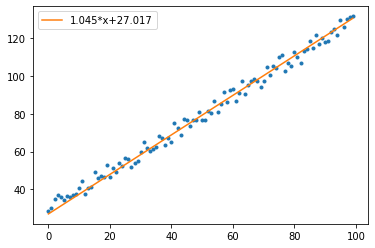

In [6]:
plt.plot(x[:,1], y, '.')
plt.plot(x[:,1], x[:,1]*theta[1]+theta[0], '-', label='%.3f*x+%.3f' % (theta[1], theta[0]))
plt.legend()

----

### pytotch 实现线性回归

参考：

[第三章 PyTorch基础：Tensor和Autograd](https://github.com/chenyuntc/pytorch-book/blob/master/chapter3-Tensor%E5%92%8Cautograd/Tensor.ipynb)

[PyTorch 0.4.0迁移指南以及代码兼容](https://www.ptorch.com/news/190.html)

In [103]:
import torch as t
from matplotlib import pyplot as plt

from IPython import display
%matplotlib inline

In [135]:
# device = t.device('cuda:0')
device = t.device('cpu')

In [105]:
# t.set_default_tensor_type('torch.cuda.FloatTensor')

In [106]:
t.manual_seed(1000) 

def get_fake_data(batch_size=8):
    ''' 产生随机数据：y=x*2+3，加上了一些噪声'''
    x = t.rand(batch_size, 1, device=device) * 5
    y = x * 2 + 3 +  t.randn(batch_size, 1, device=device)
    return x, y

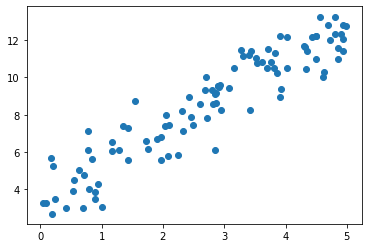

In [107]:
# 来看看产生的x-y分布
x, y = get_fake_data(batch_size=100)
plt.scatter(x.squeeze().cpu().numpy(), y.squeeze().cpu().numpy())

In [108]:
# 随机初始化参数
w = t.rand(1, 1).to(device)
b = t.zeros(1, 1).to(device)

lr =0.02 # 学习率

for ii in range(500):
    x, y = get_fake_data(batch_size=4)
    
    # forward：计算loss
    y_pred = x.mm(w) + b.expand_as(y) # x@W等价于x.mm(w); for python3 only
    loss = 0.5 * (y_pred - y) ** 2 # 均方误差
    loss = loss.mean()
    
    # backward：手动计算梯度
    dloss = 1
    dy_pred = dloss * (y_pred - y)
    
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()
    
    # 更新参数
    w.sub_(lr * dw)
    b.sub_(lr * db)
        
print('w: ', w.item(), 'b: ', b.item())

w:  2.1197423934936523 b:  3.053689479827881


----

参考：[PyTorch basics - Linear Regression from scratch](https://www.kaggle.com/aakashns/pytorch-basics-linear-regression-from-scratch)

In [109]:
import torch.nn as nn

In [110]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')
# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], [22, 37], [103, 119], 
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119], 
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119]], dtype='float32')

In [111]:
inputs = t.from_numpy(inputs)
targets = t.from_numpy(targets)

In [112]:
from torch.utils.data import TensorDataset, DataLoader

In [113]:
# Define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]], device='cpu'), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]], device='cpu'))

In [114]:
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[ 87., 134.,  58.],
         [ 73.,  67.,  43.],
         [102.,  43.,  37.],
         [ 91.,  88.,  64.],
         [102.,  43.,  37.]], device='cpu'), tensor([[119., 133.],
         [ 56.,  70.],
         [ 22.,  37.],
         [ 81., 101.],
         [ 22.,  37.]], device='cpu')]

In [127]:
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.0731, -0.0245, -0.3327],
        [-0.0493, -0.4439, -0.1355]], requires_grad=True)
Parameter containing:
tensor([0.5205, 0.0675], requires_grad=True)


In [128]:
# Define optimizer
opt = t.optim.SGD(model.parameters(), lr=1e-5)

In [129]:
import torch.nn.functional as F

In [130]:
# Define loss function
loss_fn = F.mse_loss

In [131]:
loss = loss_fn(model(inputs), targets)
print(loss)

RuntimeError: Expected object of backend CUDA but got backend CPU for argument #4 'mat1'

----

参考：[第三章 PyTorch基础：Tensor和Autograd - Autograd](https://github.com/chenyuntc/pytorch-book/blob/master/chapter3-Tensor%E5%92%8Cautograd/Autograd.ipynb)

In [132]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display 
import numpy as np

In [133]:
t.manual_seed(1000) 

def get_fake_data(batch_size=8):
    ''' 产生随机数据：y = x*2 + 3，加上了一些噪声'''
    x = t.rand(batch_size,1) * 5
    y = x * 2 + 3 + t.randn(batch_size, 1)
    return x, y

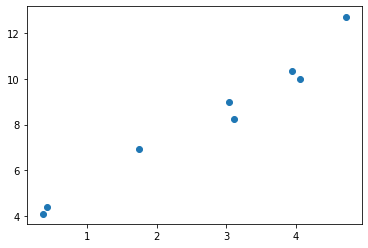

In [137]:
x, y = get_fake_data()
plt.scatter(x.squeeze().cpu().numpy(), y.squeeze().cpu().numpy())

In [139]:
# 随机初始化参数
w = t.rand(1,1, requires_grad=True)
b = t.zeros(1,1, requires_grad=True)
losses = np.zeros(500)

lr =0.005 # 学习率

for ii in range(500):
    x, y = get_fake_data(batch_size=32)
    
    # forward：计算loss
    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    losses[ii] = loss.item()
    
    # backward：手动计算梯度
    loss.backward()
    
    # 更新参数
    w.data.sub_(lr * w.grad.data)
    b.data.sub_(lr * b.grad.data)
    
    # 梯度清零
    w.grad.data.zero_()
    b.grad.data.zero_()
    
#     if ii%50 ==0:
#         # 画图
#         display.clear_output(wait=True)
#         x = t.arange(0, 6).view(-1, 1)
#         y = x.mm(w.data) + b.data.expand_as(x)
#         plt.plot(x.numpy(), y.numpy()) # predicted
        
#         x2, y2 = get_fake_data(batch_size=20) 
#         plt.scatter(x2.numpy(), y2.numpy()) # true data
        
#         plt.xlim(0,5)
#         plt.ylim(0,13)   
#         plt.show()
#         plt.pause(0.5)
        
print(w.item(), b.item())

2.200345039367676 2.976356029510498


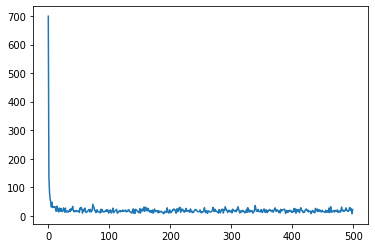

In [142]:
plt.plot(losses)